# Data Exploration

## Set Up

set up environments and load the data

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [2]:
data_path = os.path.abspath(os.pardir + '/Data/train.csv')
df = pd.read_csv(data_path, na_values=['Na', 'null']).fillna(0)

## number of impressions

In [3]:
print(df.count(axis = 0))

click             2430981
weekday           2430981
hour              2430981
bidid             2430981
userid            2430981
useragent         2430981
IP                2430981
region            2430981
city              2430981
adexchange        2430981
domain            2430981
url               2430981
urlid             2430981
slotid            2430981
slotwidth         2430981
slotheight        2430981
slotvisibility    2430981
slotformat        2430981
slotprice         2430981
creative          2430981
bidprice          2430981
payprice          2430981
keypage           2430981
advertiser        2430981
usertag           2430981
dtype: int64


## number of clicks

In [34]:
print(pd.value_counts(df['click'].values))

print((pd.value_counts(df['click'].values)[1] / pd.value_counts(df['click'].values)[0])*100)

0    2429188
1       1793
dtype: int64
0.0738106725374899


## costs (bid prize, pay prize,  slot prize)

In [39]:
print(df['bidprice'].mean(axis=0)) # average bid prize
print(df['bidprice'].max(axis=0)) # maximum bid prize
print(df['bidprice'].min(axis=0)) # maximum bid prize

print('\n', df['bidprice'].quantile([0.0, 0.25, 0.5, 0.75, 1.0])) # quantiles

272.9620461862927
300
227

 0.00    227.0
0.25    241.0
0.50    294.0
0.75    300.0
1.00    300.0
Name: bidprice, dtype: float64


In [6]:
print(df['payprice'].mean(axis=0)) # average bid prize
print(df['payprice'].max(axis=0)) # maximum bid prize
print(df['payprice'].min(axis=0)) # minimum bid prize

print('\n', df['payprice'].quantile([0.0, 0.25, 0.5, 0.75, 1.0])) # quantiles\

78.15141623895867
300
0

 0.00      0.0
0.25     33.0
0.50     68.0
0.75     99.0
1.00    300.0
Name: payprice, dtype: float64


In [7]:
print(df['slotprice'].mean(axis=0)) # average bid prize
print(df['slotprice'].max(axis=0)) # maximum bid prize
print(df['slotprice'].min(axis=0)) # minimum bid prize

print('\n', df['slotprice'].quantile([0.0, 0.25, 0.5, 0.75, 1.0])) # quantiles\

26.71782502619313
300
0

 0.00      0.0
0.25      0.0
0.50      5.0
0.75     50.0
1.00    300.0
Name: slotprice, dtype: float64


In [8]:
print((df['bidprice']-df['payprice']).mean(axis=0)) # average between bidprice and payprice
print((df['payprice']-df['slotprice']).mean(axis=0)) # average between payprice and slotprice

194.810629947334
51.43359121276555


In [59]:
%matplotlib notebook

<IPython.core.display.Javascript object>


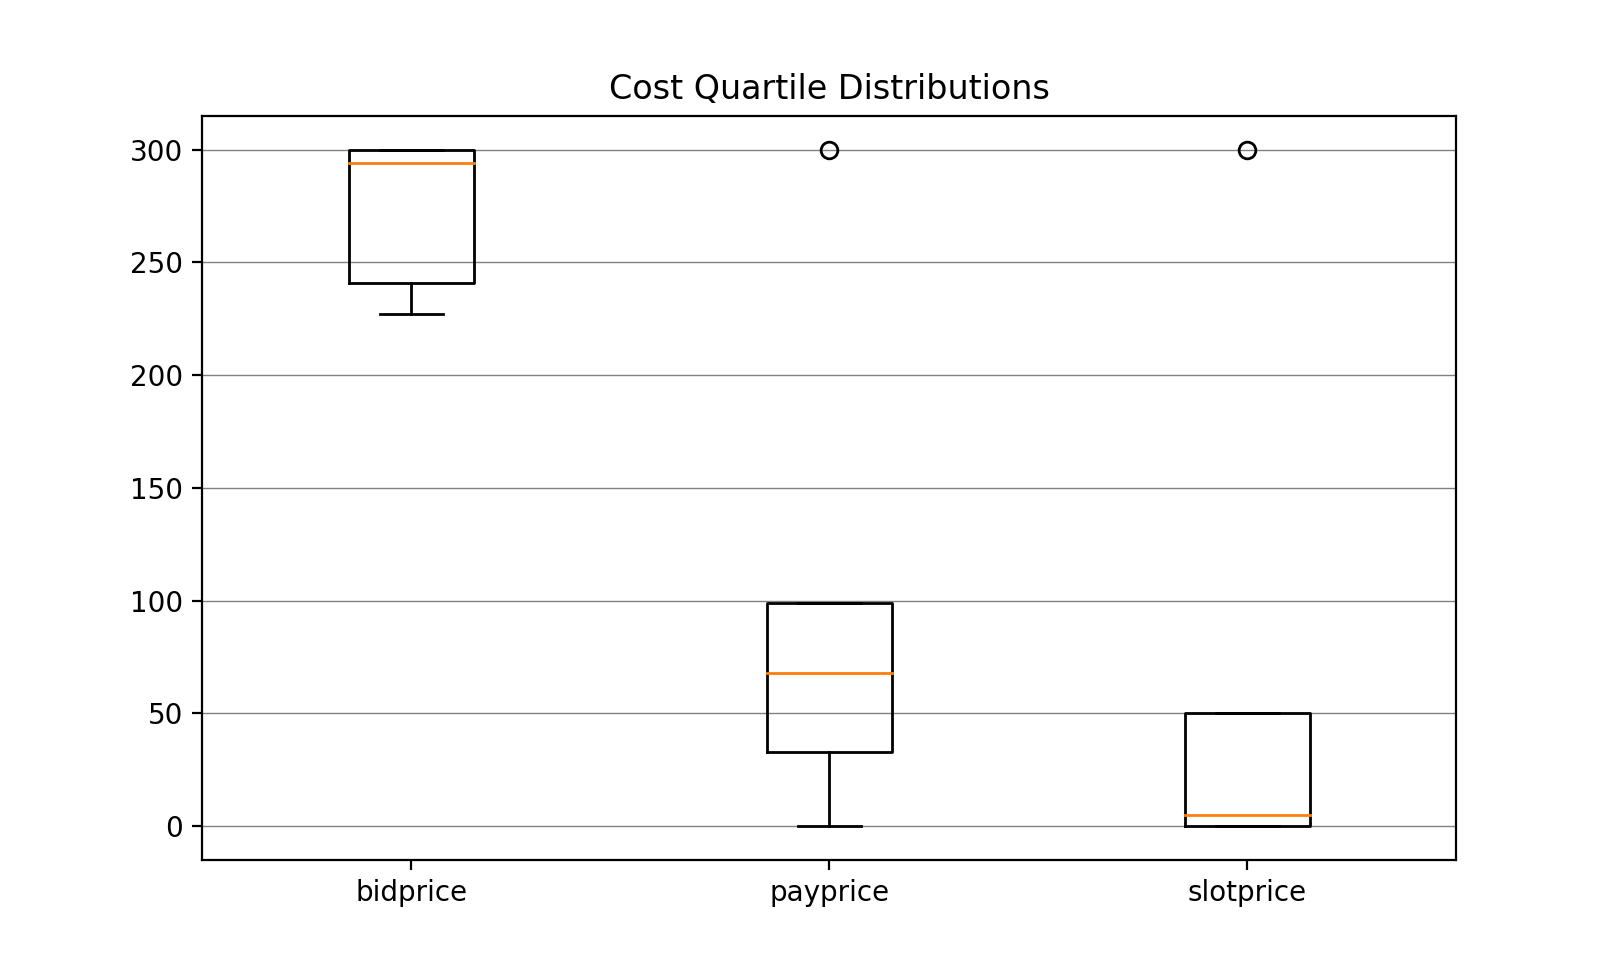

In [62]:
data = [df['bidprice'].quantile([0.0, 0.25, 0.5, 0.75, 1.0]), df['payprice'].quantile([0.0, 0.25, 0.5, 0.75, 1.0]), df['slotprice'].quantile([0.0, 0.25, 0.5, 0.75, 1.0])]

fig, ax = plt.subplots()
ax.boxplot(data)
ax.set_title("Cost Quartile Distributions")
ax.yaxis.grid(color='grey', linestyle='-', linewidth=0.5)
plt.xticks([1, 2, 3], ['bidprice', 'payprice', 'slotprice'])

plt.show()

## click-through rate CTR

In [9]:
print(len(df['userid'].unique()))  # unique users
print(len(df['advertiser'].unique()))  # unique advertisers

2342677
9


In [10]:
df.groupby(['advertiser']).count()  # Total Bids per Advertiser

,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,...,slotwidth,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,usertag
advertiser,,,,,,,,,,,,,,,,,,,,,
1458,492353,492353,492353,492353,492353,492353,492353,492353,492353,492353,...,492353,492353,492353,492353,492353,492353,492353,492353,492353,492353
2259,133673,133673,133673,133673,133673,133673,133673,133673,133673,133673,...,133673,133673,133673,133673,133673,133673,133673,133673,133673,133673
2261,110122,110122,110122,110122,110122,110122,110122,110122,110122,110122,...,110122,110122,110122,110122,110122,110122,110122,110122,110122,110122
2821,211366,211366,211366,211366,211366,211366,211366,211366,211366,211366,...,211366,211366,211366,211366,211366,211366,211366,211366,211366,211366
2997,49829,49829,49829,49829,49829,49829,49829,49829,49829,49829,...,49829,49829,49829,49829,49829,49829,49829,49829,49829,49829
3358,264956,264956,264956,264956,264956,264956,264956,264956,264956,264956,...,264956,264956,264956,264956,264956,264956,264956,264956,264956,264956
3386,455041,455041,455041,455041,455041,455041,455041,455041,455041,455041,...,455041,455041,455041,455041,455041,455041,455041,455041,455041,455041
3427,402806,402806,402806,402806,402806,402806,402806,402806,402806,402806,...,402806,402806,402806,402806,402806,402806,402806,402806,402806,402806
3476,310835,310835,310835,310835,310835,310835,310835,310835,310835,310835,...,310835,310835,310835,310835,310835,310835,310835,310835,310835,310835


In [11]:
df.groupby(['advertiser']).mean()  # Click-Through Rates per Advertiser

,click,weekday,hour,region,city,adexchange,urlid,slotwidth,slotheight,slotformat,slotprice,bidprice,payprice
advertiser,,,,,,,,,,,,,
1458,0.000782,2.995215,14.071445,144.312473,149.355330,2.027846,0.0,596.508249,204.694863,0.337288,28.275305,300.000000,68.992646
2259,0.000322,3.112895,10.480853,216.000000,222.848391,1.952249,0.0,506.677803,191.845399,0.000000,24.529157,288.078939,92.974931
2261,0.000327,4.403498,11.964285,139.525109,143.821925,1.993889,0.0,498.512577,217.682570,0.000000,27.127967,287.877981,89.662184
2821,0.000620,0.656827,16.050997,141.102732,145.679632,2.764513,0.0,611.500809,185.094008,0.000000,23.308943,290.224894,89.077922
2997,0.004355,3.531116,17.154227,153.235064,157.645748,0.000000,0.0,320.000000,50.000000,0.000000,33.779586,277.000000,62.800116
3358,0.000762,3.222120,12.144062,152.834255,157.709752,1.672632,0.0,561.837830,197.195572,0.547023,17.419896,232.981091,84.720599
3386,0.000703,3.006035,13.779347,145.088774,149.961441,2.200648,0.0,580.857817,183.502366,0.275725,29.499239,300.000000,76.766320
3427,0.000675,3.116825,13.722705,146.293370,151.283074,2.138687,0.0,621.612533,177.090783,0.280418,29.293809,236.388882,75.616329
3476,0.000602,2.748860,12.490978,144.622372,149.276166,2.104564,0.0,574.649168,190.843245,0.299217,26.748307,247.856152,76.950083


In [12]:
%matplotlib notebook

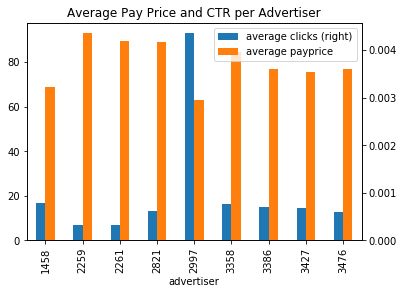

In [22]:
advertiser_mean = df.groupby(['advertiser']).mean()
df_plot = pd.DataFrame(df.groupby(['advertiser']).mean(), columns = [ 'click' , 'payprice'])
df_plot.rename(index=str, columns={'click': 'average clicks', 'payprice': 'average payprice'}, inplace=True)

df_plot.plot.bar(sharey=False, secondary_y = 'average clicks', title = "Average Pay Price and CTR per Advertiser")

In [14]:
print(df['click'].mean()) # Average Click-Through Rate

0.0007375623256619447


## Time Series

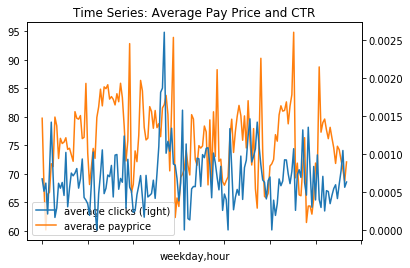

In [21]:
time_df = pd.DataFrame(df.groupby(['weekday','hour']).mean(), columns = ['click' , 'payprice'])
time_df.rename(index=str, columns={'click': 'average clicks', 'payprice': 'average payprice'}, inplace=True)

time_df.plot(sharey=False, secondary_y = 'average clicks', title = "Time Series: Average Pay Price and CTR")

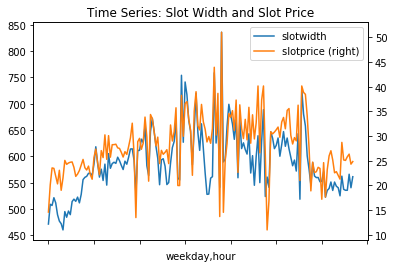

In [20]:
time_df = pd.DataFrame(df.groupby(['weekday','hour']).mean(), columns = ['slotwidth' , 'slotprice'])
time_df.rename(index=str, columns={'click': 'average clicks', 'payprice': 'average payprice'}, inplace=True)

time_df.plot(sharey=False, secondary_y = 'slotprice', title = "Time Series: Slot Width and Slot Price")

In [17]:
%matplotlib inline

## Slot Visibility

In [29]:
df['slotvisibility'] = df['slotvisibility'].map({'Na': 0, 'FirstView': 100, 'SecondView': 50, 'ThirdView': 20, 'OtherView': 5})
